# Style Transfer

This notebook implements style transfer using pytorch with the help of VGG-16 pre-trained model.

### Load VGG-19 pre-trained model

In [1]:
import torch
from torchvision import models

model = models.vgg19(pretrained=True).features

# Freeze VGG parameters
for param in model.parameters():
    param.requires_grad_(False)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

### Process Image

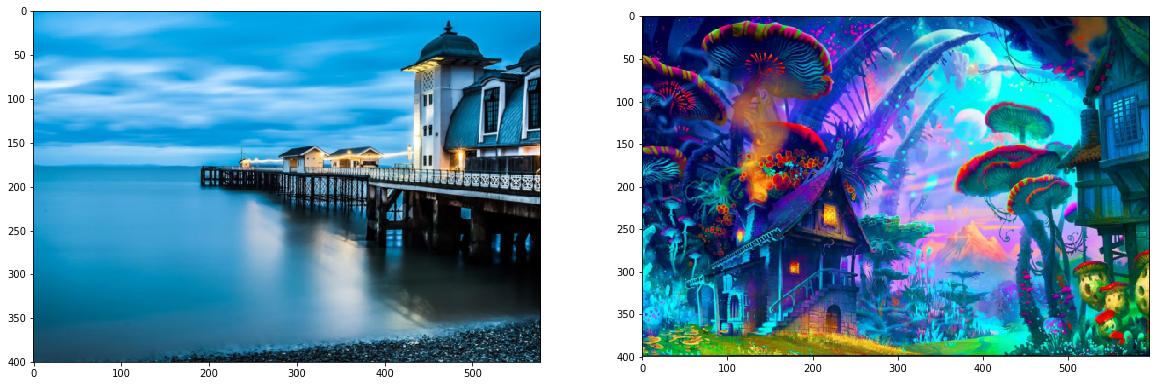

In [2]:
from PIL import Image
from torchvision import transforms
import numpy as np

def processImage(img, max_size=400, shape=None):
    image = Image.open(img).convert('RGB')
    
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
    
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485,0.456,0.406),
                            (0.229,0.224,0.225))])
    image = transform(image)[:3,:,:].unsqueeze(0)
    
    return image

content = processImage('./images/content.jpg').to(device)
style = processImage('./images/paint.jpg').to(device)

%matplotlib inline
import matplotlib.pyplot as plt

def convertImage(img):
    image = img.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229,0.224,0.225)) + np.array((0.485,0.456,0.406))
    image = image.clip(0,1)
    return image

# Display Content and Style Images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(convertImage(content))
ax2.imshow(convertImage(style))